<a href="https://colab.research.google.com/github/Prajaktaupadhayay-code/Computational-Stats/blob/main/CSSL_04_Introduction_to_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is *optimization*?
Optimization means finding the best choice among many possibilities. We encounter it in many aspects of our daily lives, such as: when we are tuning our recipe indegredients to make the food taste better, when we finding the best route to take to get to a place quickly.

Much of statistical learning deals with building models to make predictions. Optimization plays an important role here as well. In statistical learning, we optimize model settings so predictions are as close as possible to reality.

Let us take a simple example. Suppose we are predicting students' test scores based on the hours spent studying. If we assume that more study hours (h) implies better test scores (s), we can begin with a linear simple model:

$s=a+bh$

This is the equation of a straight line. Optimization in this context means adjusting a and b so the line fits the data best.

_But how do we know that a particular line fits the data best?_

Short answer - loss functions! Loss functions measure how bad our predictions are.

Good predictions->small loss

bad predictions->large loss.

So if want the model that _best_ fits the data, we need to minimize the loss.

Let us take a simple loss function and understand how to minimize the loss.

$loss = x^2$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Create a function called loss_func that takes in as input some value and returns its square
def loss_func(x):
  return x**2


Now let us plot this curve to visualize the loss function

Text(0.5, 1.0, 'Loss function')

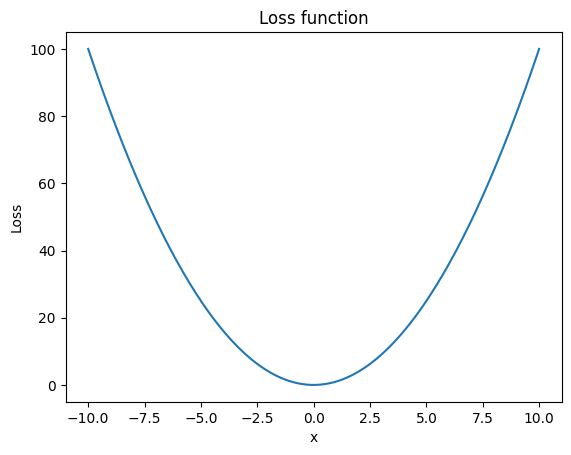

In [ ]:
# Create 2 arrays of x_values and the corresponding y_values and plot the curve

x_values =np.arange(-10, 10.1, 0.1)
y_values = loss_func(x_values)

fig, ax = plt.subplots()
ax.plot(x_values, y_values)
ax.set_xlabel("x")
ax.set_ylabel("Loss")
ax.set_title("Loss function")

This curve has a single minimum value which occurs at x=0. Such functions which have a single global minimum are referred to as convex functions. When multiple minima exist, things get more difficult!

Now let's try walking down this gradient. The strategy is pretty simple.
1. Start with a guess
2. Look at slope (aka gradient) at that point
3. Take a small step in the downhill direction
4. Repeat steps 1-3 until you reach the base of the valley.

In [ ]:
# Starting point
x=8


# How big each step is
step_size=0.1


# Store steps for plotting
steps = [x]

# Create a loop for the repetition step and move downhill in each step
for s in range(100):
    slope = 2 * x
    if slope > 0:
        next_x = x - step_size
    elif slope < 0:
        next_x = x + step_size
    else:
        break

    steps.append(next_x)
    x = next_x




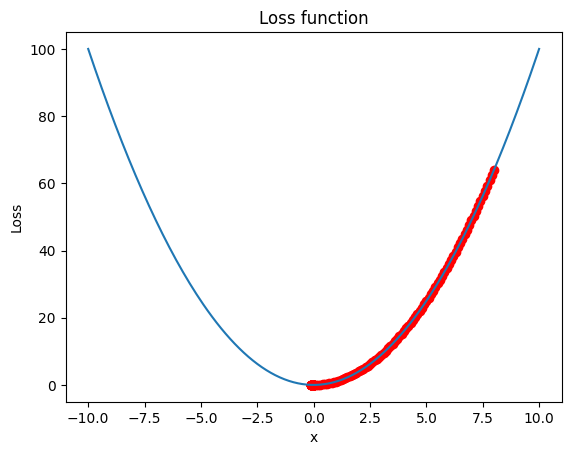

In [ ]:
x_values =np.arange(-10, 10.1, 0.1)
y_values = loss_func(x_values)

fig, ax = plt.subplots()
ax.plot(x_values, y_values)
ax.set_xlabel("x")
ax.set_ylabel("Loss")
ax.set_title("Loss function")
plt.scatter(steps, loss_func(np.array(steps)), color ="red")

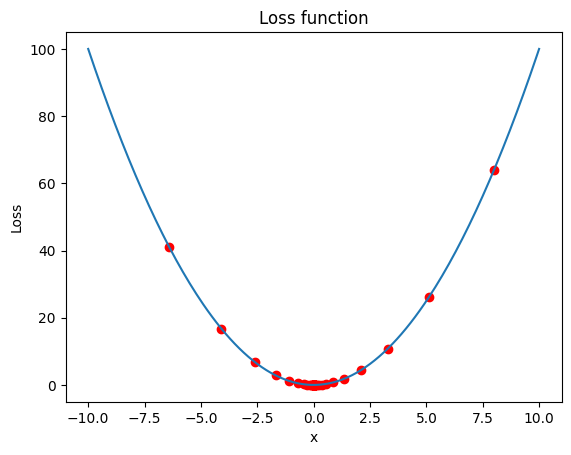

In [ ]:
# Starting point
x=8

# How big each step is
learning_rate = 0.9

# Store steps for plotting
steps = [x]
# Create a loop for the repetition step and move downhill in each step
for s in range(100):
    slope = 2 * x

    next_x = x - slope*learning_rate

    steps.append(next_x)
    x = next_x
x_values =np.arange(-10, 10.1, 0.1)
y_values = loss_func(x_values)

fig, ax = plt.subplots()
ax.plot(x_values, y_values)
ax.set_xlabel("x")
ax.set_ylabel("Loss")
ax.set_title("Loss function")
plt.scatter(steps, loss_func(np.array(steps)), color ="red")

Let us try visualizing the walk

### Homework
1. Draw a curve with multiple minima. Why do you think it would be difficult to get to the absolute minimum (aka global minimum) in this case?
2. Can you write a simple mathematical equation that has multiple minima?

In [ ]:
def non_convex_loss(x):
  return x**4 - 10*x*2 + 5*x

Text(0.5, 1.0, 'Loss function')

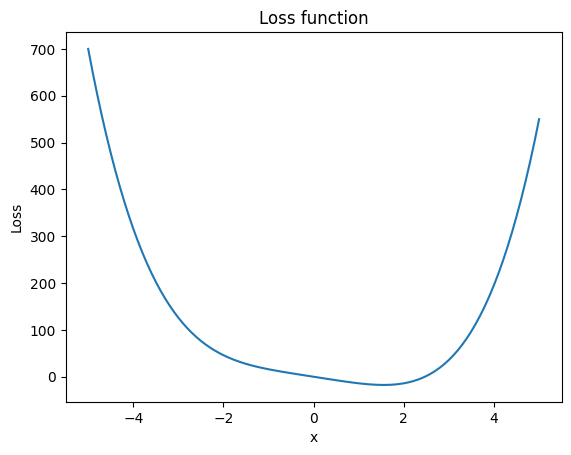

In [ ]:
x_values =np.arange(-5, 5.1, 0.1)
y_values = non_convex_loss(x_values)

fig, ax = plt.subplots()
ax.plot(x_values, y_values)
ax.set_xlabel("x")
ax.set_ylabel("Loss")
ax.set_title("Loss function")

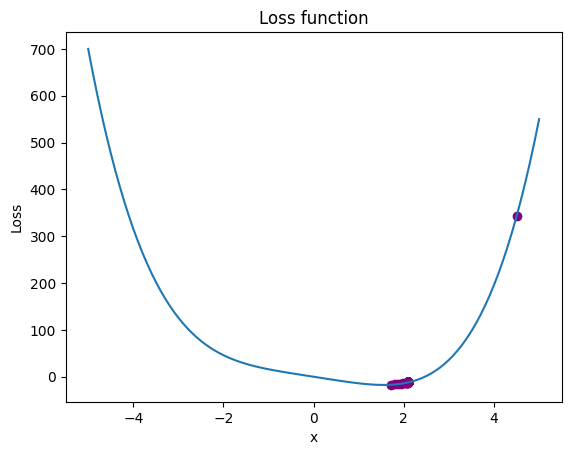

In [ ]:
# Starting point
x=4.5

# How big each step is
learning_rate = 0.01

# Store steps for plotting
steps = [x]
# Create a loop for the repetition step and move downhill in each step
for s in range(200):
    slope = 4*x**3 - 20*x + 5

    next_x = x - slope*learning_rate

    steps.append(next_x)
    x = next_x
x_values =np.arange(-5, 5.1, 0.1)
y_values = non_convex_loss(x_values)

fig, ax = plt.subplots()
ax.plot(x_values, y_values)
ax.set_xlabel("x")
ax.set_ylabel("Loss")
ax.set_title("Loss function")
plt.scatter(steps, non_convex_loss(np.array(steps)), color ="purple")